In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
import json
import ast


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', 0)


In [64]:
DOMAIN="clinical"

def replace_quotation(el):
    try:
        return json.loads(el)
    except:
        el = el.replace("\'", '"')
        
def load_csv(csv_path):
    df = pd.read_csv(csv_path)
    print(df.columns)
    df.loc[:, "medical_entities"] =  df.loc[:, "medical_entities"].apply(lambda x: ast.literal_eval(x))
    df = df.rename(columns={"text":"transcript"})

    return df


In [65]:
csv_path="/data3/abraham/asr_benchmarking/data/with_entities_intron_fresh_audio_Production-Test-Set-Quality_2024_03_05_21_16_28.538356_with_labels_local_correct_transcript.csv"
df_test = load_csv(csv_path)

print(len(df_test))

Index(['date', 'audio_id', 'audio_path', 'audio_duration', 'sentence_id',
       'source', 'doc_id', 'seq_id', 'text', 'prediction', 'char_len',
       'quality', 'project_id', 'project_name', 'user_id', 'level', 'status',
       'age_group', 'gender', 'accent', 'discipline', 'education',
       'institution', 'clinical_experience', 'city', 'country',
       'num_pos_feedback_received', 'num_neg_feedback_received',
       'num_feedback_received', 'neg_percent', 'Background Noise',
       'Multiple Speakers', 'Background Speakers',
       'Bad Network or Corrupt Audio', 'Numbers',
       'Leading or Trailing noise or silence', 'Good Quality Audio',
       'African Named Entities', 'Clear Speech', 'Incorrect Transcript',
       'Music', 'Good Quality', 'medical_entities', 'phi', 'medical_con',
       'medical_con_list', 'test', 'test_list', 'anatomy', 'anatomy_list',
       'medication', 'medication_list', 'treatment', 'treatment_list',
       'procedure', 'procedure_list'],
      dtype=

In [66]:
df_test

,date,audio_id,audio_path,audio_duration,sentence_id,source,doc_id,seq_id,transcript,prediction,...,test,test_list,anatomy,anatomy_list,medication,medication_list,treatment,treatment_list,procedure,procedure_list
0,2024-02-28 00:12:58.764668,513ef5d4-a823-4113-b757-4ed91d5d5e17,/data4/data/prod2/blob_52537.wav,1.0,7e3ff9d7-79fe-4eba-9c0b-d5c10074a2f5,Production-Test-Set,1107,1107,"Hello, my name is Tolu. I'm an orthodontist in a tertiary hospital in Nigeria. I deal in correcting malocclusions in children and adults and giving them aesthetic smiles. It's been quite a rewarding experience. seeing children leaving my clinic with smiles on their faces and seeing their parents beaming, knowing that options that were previously unavailable to them are now available to them to help improve the physical appearances of their wards. It's a fun job and I usually am satisfied at the end of the day. Also one of the most highly rewarding specialties in dentistry. But in Nigeria and other parts of the world, I would like you to come visit us one of these days. Thank you for listening.",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-28 00:12:58.761194,53f8b873-233f-455d-96e5-bbf5a41205ba,/data4/data/prod2/blob_58081.wav,1.0,056d8c3e-06a6-46da-a0fb-f9d4cad5dd65,Production-Test-Set,1106,1106,Add comma.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-28 00:12:58.756045,32896923-f849-4aa3-9eda-dccc7284a309,/data4/data/prod2/blob_312.wav,1.0,05f2bfd7-822d-4658-ae31-eaa078438fb5,Production-Test-Set,1105,1105,"Hi, what are you doing today?",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-28 00:12:58.750599,1e5a3d4f-b2a3-4596-8dff-e266a45c11bb,/data4/data/prod2/blob_68923.wav,1.0,af12a172-5958-4a13-9842-e75d8761a398,Production-Test-Set,1104,1104,"Hypertension generally can cause a lot of diseases. The person could be prone to stroke, the person could also be prone to other diseases like diabetes, diabetes mellitus, precisely type 1, type 2. There could be some neurological disorders, it could be some nephrological disorders, and most times patients that have the heart diseases they most likely come down stroke, meaning they'll be bedridden for a while and have sores.",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-28 00:12:58.745783,58a1c6e2-93e8-41df-b217-cbe19df77340,/data4/data/prod2/blob_45300.wav,1.0,89af42a8-c52e-45ad-9539-366fc85398f8,Production-Test-Set,1103,1103,"most times, when people do general examination you hear them say something like afebrile, not pale, aneteric, acyanosed, but this doesn't affect everybody. Sometimes, some people have general examination to be normal but then again they are having ill state of mind.",NaN,...,1.0,['general examination'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2024-02-28 00:12:53.231912,834008ec-e9f8-4e9d-95c3-4201ff441af5,/data4/data/prod2/9322150e-2244-40af-bb14-dcdf4751b845_5c28db3297054032b215be94c26e1541.wav,1.0,0c2102f5-c51d-428b-a8f6-69133514aa21,Production-Test-Set,4,4,The patient is an 8-year-old man.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958,2024-02-28 00:12:53.226459,48c40e5e-a328-4572-bb61-ad902dc9ffdf,/data4/data/prod2/2f65660c-7c7d-4d92-82e1-a2945f496c84_61b8a469adb1493c9e251918848bb8b8.wav,1.0,9d1acb2b-66a5-4b62-a887-d7745f9ae7bb,Production-Test-Set,3,3,The patient is an 80 year old Japanese with the history of severe,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2024-02-28 00:12:53.218176,eb5260ff-de21-4ae9-b73f-3d891c5ef7cc,/data4/data/prod2/2f65660c-7c7d-4d92-82e1-a2945f496c84_533166bd6806444c8dbc92c25fef920f.wav,1.0,09933351-6870-47df-996d-1f2d311994f0,Production-Test-Set,2,2,"aortic stenosis status, valve replacement, and replacement with a history of congestive heart failure from diastolic dysfunction, and alcohol abuse with the history of varices who comes in with the chief complaint of problems breathing and catching my breath associated w

In [67]:

def get_entities_values(df, attribute="Score"):
    values = []
    for i in range(len(df)):
        entities = df["medical_entities"][i]
        if entities is not None:
            entities = entities["Entities"]
            for j in range(len(entities)):
                values.append(entities[j][attribute])
    return values

In [68]:
categories = list(set(get_entities_values(df_test, attribute="Category")))

# make sure the entities categories are the same for train and test
assert set(set(get_entities_values(df_test, attribute="Category"))) == set(categories)
categories

['MEDICAL_CONDITION',
 'BEHAVIORAL_ENVIRONMENTAL_SOCIAL',
 'TIME_EXPRESSION',
 'MEDICATION',
 'TEST_TREATMENT_PROCEDURE',
 'ANATOMY',
 'PROTECTED_HEALTH_INFORMATION']

In [69]:
VALID_CATEGORIES = ["MEDICATION", "MEDICAL_CONDITION", 
                    "ANATOMY", "PROTECTED_HEALTH_INFORMATION",
                   "TEST_TREATMENT_PROCEDURE"]
VALID_CATEGORIES_COUNT = ["MEDICATION_count", "MEDICAL_CONDITION_count", 
                          "ANATOMY_count", "PROTECTED_HEALTH_INFORMATION_count",
                         "TEST_TREATMENT_PROCEDURE_count"]

,scores_test
count,8582.000000
mean,0.859974
std,0.172536
min,0.046724
25%,0.762743
50%,0.950700
75%,0.988330
max,1.000000


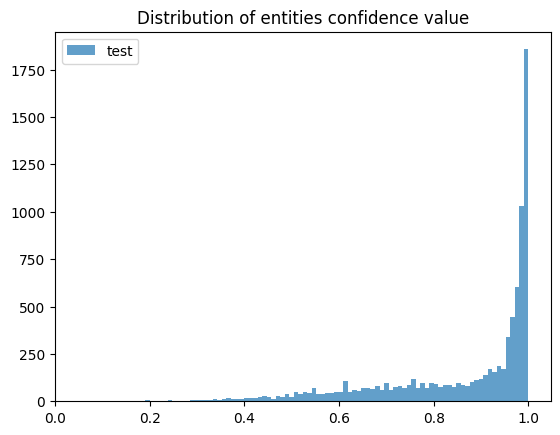

In [70]:

scores_test =  get_entities_values(df_test, attribute="Score")
display(pd.DataFrame(scores_test, columns=["scores_test"]).describe())

_ = plt.hist(scores_test, bins=100, label="test", alpha=0.7)

plt.legend()
_ = plt.title("Distribution of entities confidence value")

In [71]:
def scores_per_category(df):
    medical_entities = df.medical_entities
    scores_dict = {}
    
    for el in medical_entities:
        if el is not None:
            entities = el["Entities"]
            for entity in entities:
                text = entity["Text"]
                category = entity["Category"]
                score = entity["Score"]
                if scores_dict.get(category) is None:
                    scores_dict[category] = [score]
                else:
                    scores_dict[category].append(score)
    return scores_dict

scores_per_cat = scores_per_category(df_test)
for k in scores_per_cat.keys():
    print(f"Scores for {k}")
    print(f"Min value: {round(min(scores_per_cat[k]), 3)}", f"Max value: {round(max(scores_per_cat[k]), 3)}")
    

Scores for PROTECTED_HEALTH_INFORMATION
Min value: 0.092 Max value: 1.0
Scores for MEDICAL_CONDITION
Min value: 0.047 Max value: 0.999
Scores for ANATOMY
Min value: 0.285 Max value: 1.0
Scores for TEST_TREATMENT_PROCEDURE
Min value: 0.309 Max value: 0.999
Scores for BEHAVIORAL_ENVIRONMENTAL_SOCIAL
Min value: 0.298 Max value: 1.0
Scores for TIME_EXPRESSION
Min value: 0.428 Max value: 1.0
Scores for MEDICATION
Min value: 0.087 Max value: 0.999


In [72]:
def get_transcript_per_category(df, category, min_range, max_range):
    medical_entities = df.medical_entities
    idxs = []
    texts = []
    scores = []
    
    for idx, el in enumerate(medical_entities):
        if el is not None:
            entities = el["Entities"]
            for entity in entities:
                score = entity["Score"]
                if entity["Category"] == category and  (min_range <= score and max_range >= score):
                    idxs.append(idx)
                    texts.append(entity["Text"])
                    scores.append(score)
    df = df.iloc[idxs]
    df.loc[:, "category"] = [category]*len(df)
    df.loc[:, "text"] = texts
    df.loc[:, "score"] = scores
    return df

In [73]:
def transcript_per_category_range(df, n=1, min_range=0, max_range=1, random_state=42):
    out_df = []
    for category in VALID_CATEGORIES:
        out = get_transcript_per_category(df, category=category, min_range=min_range, max_range=max_range)
        if len(out) > n:
            out_df.append(out[["transcript", "category", "text", "score"]].sample(n, random_state=random_state))
        else:
            out_df.append(out[["transcript", "category", "text", "score"]].head(n))

    out_df = pd.concat(out_df).sort_values(["category", "score"], ascending=True)
    return out_df

In [74]:
min_range=0
max_range=0.3
random_state=42
n=1

transcript_per_category_range(df_test, n=n, min_range=min_range, max_range=max_range, random_state=random_state)

,transcript,category,text,score
515,"A 16 year old male with no significant past medical history presents to the emergency department with abdominal pain. He states the pain began a few days ago in the right lower quadrant of the abdomen and now feels as though it is spreading to his mid abdomen. It describes the pain as coming on suddenly and sharp in nature. Since the onset, his pain started to improve until the morning of his presentation to the emergency department, when it accurately worsened. He says that the pain is much worse with movement. The patient is concerned about a possible hernia as it does heavy lifting and work. Review of systems is negative, including no",ANATOMY,lower quadrant,0.285261
760,"Patient is a known hypertensive on medications. She didn't use her drug this morning However, she claims to have used it before now. She recently bereaved, she however is able to sleep and eat well. She complains of low back pain that is worse after sitting for too long. She still has medications to last for the next two weeks. On examination, she's a febrile anicteric, acyanosed, no peedal edema. Chest, no findings, CVS, S1, S2 only. Abdomen, NUD. Assessment, low back pain in a known hypertensive, with bereavement . Plan, tab, 2 mg. BD for 14 days. Caps pre-gabalin 75mg BD for 14 days. Tabs Iproxine 1 BD for 10 days. She's counselled and reassured to see when complaints persist.",MEDICAL_CONDITION,eat,0.196167
932,"Dr. Esponetoye Wole consulting and ready to see Adewale Adebunmi Veronica who came into the hospital this morning complaining of headache, fever, nausea, and runny stomach. During questioning, patients told us that it does a job that is hectic in the manufacturing industry. Patient also confirmed he has taken about 2000 milligrams of diclofenac, and uncountable milligrams of acetaminophen paracetamol. The patient is advised to wait for some other vitals to help further diagnosis.",MEDICATION,paracetamol,0.087179
492,"24-year-old Parazuru Plus One who complains with inability to conceive for five years duration since she got married. She lives with her husband and has cortical exposure at least three times in a week not every month however no history of dyspareunia last menstrual period was on the 3rd of may 2023 she has irregular mentis.she had a missed miscarriage last year at 8 weeks estimated gestational age. She presents for ex-part-k. On examination, she's a febrile anechthoric acyanosed pneumopedial swelling. Chest clinically clear, cardiovascular CVS S1 S2 abdomen NAD and assessment of secondary infertility is made. Plans to refer to gynecology.",PROTECTED_HEALTH_INFORMATION,gynecology,0.241528


In [75]:
SCORE_THRESHOLD=0.0
# remove nan instances
df_test = df_test[~df_test["medical_entities"].isna()]




# Apply clean_text function on transcript


In [76]:
import re
import jiwer
import string
from whisper.normalizers import EnglishTextNormalizer


clinical = ["General-Clinical", "Clinical-Surgery", "Talk-Very-Fast-Clinical", 
            "Pre-Clinical", "Clinical-Medicine", "Pre-Clinical-INT"]
general = ["40yrs-old-and-above", "Talk-Very-Fast-Anyone", 'Transcribe-Inference',
           "Naija-News-Non-Clinical", "News-Anyone-INT", 'Transcribe-Conversation']
legal = ['Legally-Speaking', 'Transcribe-NASS', 'Transcribe-Kenya', 
         'Transcribe-South-Africa', 'Transcribe-Ghana']

inaudible_tags = ['[music] [inaudible]', '(inaudible) ', '[inaudible)', '(inaudible]',
                  '[Inaudible].', '[music]','[INAUDIBLE]',' [Inaudible]', '(Inaudible).',
                  '[Inaudible] ', '[silence]','[Silence]', '[inaudible] ', 'in aduible',
                  '(inaudible)','(Inaudible)','[Inaudible]', 'Inaudible','[inaudible]',
                  '[inaudable]','[Inaudible]','Inaudable ','Blank ', 'inaudible', 'Inaudible ', 
                  '(audio is empty)', 'noise', '(noise)', '[noise]', 'Blank'
                 ]
inaudible_tags_regex = [x.replace('[', '\[').replace(']', '\]').replace('(', '\(').replace(')', '\)') for x in inaudible_tags]
inaudible_tags_joined = "|".join(inaudible_tags_regex)
rx = re.compile(inaudible_tags_joined, re.I)
translator = str.maketrans('', '', string.punctuation)


def clean_filler_words(text):
    text = text.replace("inaudible. ", "").replace("inaudible", "")\
        .replace(" ehm, ", " ").replace(" uh, "," ").replace(" er, "," ").replace("...", " ")
    return text

In [77]:
def clean_text(text):
    """
    post processing to normalized reference and predicted transcripts
    :param text: str
    :return: str
    """
    if type(text) != str:
        print(text)
        return " "

    # remove multiple spaces
    text = clean_filler_words(text)
    text = re.sub(r"\s\s+", " ", text)
    # strip trailing spaces
    text = text.strip()
    text = text.replace('>', '')
    text = text.replace('\t', ' ')
    text = text.replace('\n', '')
    text = text.lower()
    text = text.replace(" comma,", " ") \
        .replace(" koma,", " ") \
        .replace(" coma,", "") \
        .replace(" comma", " ") \
        .replace(" full stop.", " ") \
        .replace(" full stop", " ") \
        .replace(",.", " ") \
        .replace(",,", " ") \
        .replace("?", " ") \
        .replace(",", " ") \
        .replace(".", " ") \
        .replace("  ", " ") \
        .strip()
    text = " ".join(text.split())
    text = text.translate(translator)
    text = re.sub(r"[^a-zA-Z0-9\s\.\,\-\?\:\'\/\(\)\[\]\+\%]", '', text)
    return text

In [78]:
df_test["transcript_original"] = df_test["transcript"]
df_test["transcript"] = df_test.transcript.apply(lambda x: clean_text(x) if type(x) == str else "")


In [79]:
# find character that can be used to join the texts
candidate_char = ["_", " ", "-", ";"]
all_chars_in_transcript = set("".join(list(df_test["transcript"].values)))

JOIN_CHAR = None

for char in candidate_char:
    if char in all_chars_in_transcript:
        continue
    else:
        JOIN_CHAR = char
        break

if JOIN_CHAR is None:
    JOIN_CHAR = ""
    
print(JOIN_CHAR)

_


In [80]:
def concat_all_entities(row):
    transcript = row['transcript'].lower()
    el = row["medical_entities"]
    entities = el["Entities"]
    texts = []
    
    for entity in entities:
        
        text = entity["Text"].lower().rstrip("")
        score = entity["Score"]
        entity_category = entity["Category"]

        if entity_category in VALID_CATEGORIES and score >= SCORE_THRESHOLD:
            # we want to avoid single character matches
            if len(text) > 1:
                text= clean_text(text)
#                 text_index = transcript.index(text)
                try:
                    text_index = transcript.index(text)
#                     texts.append(text.lower())
                
                except Exception as e:
                    print(f"---Exception: {e}")
                    print(f"Entity: {text}")
                    print(f"Transcript: {transcript}")
                    print(f"Index: {row['audio_id']}")
#                     
                texts.append(text.lower())
                    
    return f"{JOIN_CHAR}".join(texts)

# These two functions could be merged. 
# They were separated for ease of readability and debugging purposes
def concat_entities(row, category):
    el = row["medical_entities"]
    entities = el["Entities"]
    texts = []
    for entity in entities:
        text = entity["Text"].lower().rstrip("")
        score = entity["Score"]
        entity_category = entity["Category"]

        if category == entity_category and category in VALID_CATEGORIES and score >= SCORE_THRESHOLD:
            if len(text) > 1:
                text= clean_text(text)
                # apply entities corrected in previous step
#                 if text == "paino":
#                     text = text.replace('paino', 'pain')
                
                texts.append(text)

    return f"{JOIN_CHAR}".join(texts)

def count_entities(row, category=None):
    el = row["medical_entities"]
    entities = el["Entities"]
    count = 0
    for entity in entities:
        text = entity["Text"]
        text = text.rstrip("")
        score = entity["Score"]
        entity_category = entity["Category"]

        if category == entity_category and category in VALID_CATEGORIES and score >= SCORE_THRESHOLD:
            if len(text) > 1:
                count += 1
    return count

In [81]:
df_test["cat_entities"] = df_test.apply(lambda x: concat_all_entities(x), axis=1)

---Exception: substring not found
Entity: coma
Transcript: known dm patients on trivimeds and atovastatin presents with a oneday history of generalized body weakness patient is also on followup for dementia so they report no fevers no cough no rhinorrhea no nausea no vomiting no diarrhea no abdominal pains the patient is feeding normally
Index: 590f22b8-f11e-49e1-880d-72e878c285a8
---Exception: substring not found
Entity: full stop
Transcript: patient presents with a twoday history of leftsided shoulder pain pain scale 3 over 10 the pain is dull and aching in nature nonradiating no history of trauma history of recurrent stroke repetitive movements no prior
Index: a00f096e-a3e1-4716-a786-0d199e765f13
---Exception: substring not found
Entity: full stop
Transcript: patient presents with a twoday history of leftsided shoulder pain pain scale 3 over 10 the pain is dull and aching in nature nonradiating no history of trauma history of recurrent stroke repetitive movements no prior
Index: a00

In [82]:
df_test["cat_entities"]

0      tolu_orthodontist_nigeria_nigeria                                                                                                                                                                          
1                                                                                                                                                                                                                 
2                                                                                                                                                                                                                 
3      hypertension_diseases_stroke_diseases_diabetes_diabetes mellitus_neurological disorders_nephrological disorders_heart_diseases_stroke_bedridden_sores                                                      
4      general examination_afebrile_pale_aneteric_acyanosed_general examination_ill state of mind                                                           

In [83]:
for category in VALID_CATEGORIES:
    df_test[category] = df_test.apply(lambda x: concat_entities(x, category), axis=1)

In [84]:
for category in VALID_CATEGORIES:
    df_test[f"{category}_count"] = df_test.apply(lambda x: count_entities(x, category), axis=1)

In [85]:
df_test[["cat_entities", *VALID_CATEGORIES]]

,cat_entities,MEDICATION,MEDICAL_CONDITION,ANATOMY,PROTECTED_HEALTH_INFORMATION,TEST_TREATMENT_PROCEDURE
0,tolu_orthodontist_nigeria_nigeria,,,,tolu_orthodontist_nigeria_nigeria,
1,,,,,,
2,,,,,,
3,hypertension_diseases_stroke_diseases_diabetes_diabetes mellitus_neurological disorders_nephrological disorders_heart_diseases_stroke_bedridden_sores,,hypertension_diseases_stroke_diseases_diabetes_diabetes mellitus_neurological disorders_nephrological disorders_diseases_stroke_bedridden_sores,heart,,
4,general examination_afebrile_pale_aneteric_acyanosed_general examination_ill state of mind,,afebrile_pale_aneteric_acyanosed_ill state of mind,,,general examination_general examination
...,...,...,...,...,...,...
957,,,,,,
958,80,,,,80,
959,aortic_stenosis_valve_valve replacement_replacement_congestive heart failure_heart_diastolic dysfunction_alcohol abuse_varices_problems breathing_catching my breath_swelling_legs_confusion,,stenosis_congestive heart failure_diastolic dysfunction_alcohol abuse_varices_problems breathing_catching my breath_swelling_confusion,aortic_valve_heart_legs,,valve replacement_replacement
960,80_aortic_stenosis_aortic valve_aortic valve replacement_atrial_atrial fibrillation_congestive heart failure_heart_coma_alcohol abuse_viruses_problems breathing_catching my breath_swelling_legs_confusion,,stenosis_atrial fibrillation_congestive heart failure_coma_alcohol abuse_viruses_problems breathing_catching my breath_swelling_confusion,aortic_aortic valve_atrial_heart_legs,80,aortic valve replacement


In [86]:
for category in VALID_CATEGORIES:
    df_test[f"{category}_count"] = df_test.apply(lambda x: count_entities(x, category), axis=1)

In [87]:
df_test[["transcript", "medical_entities", "cat_entities"]].sample(1)

,transcript,medical_entities,cat_entities
349,good afternoon ladies and gentlemen i bring to you the winner of todays radiology quiz competition professor doctor,"{'Entities': [], 'UnmappedAttributes': [], 'ModelVersion': '2.4.0', 'ResponseMetadata': {'RequestId': 'f99a4ac6-e9d1-4fe5-8e3c-7bc2fbc33aba', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': 'f99a4ac6-e9d1-4fe5-8e3c-7bc2fbc33aba', 'content-type': 'application/x-amz-json-1.1', 'content-length': '62', 'date': 'Tue, 11 Jun 2024 11:58:50 GMT'}, 'RetryAttempts': 0}}",


In [88]:
df_test[[ "transcript", "medical_entities", "cat_entities", *VALID_CATEGORIES]].sample(1)

,transcript,medical_entities,cat_entities,MEDICATION,MEDICAL_CONDITION,ANATOMY,PROTECTED_HEALTH_INFORMATION,TEST_TREATMENT_PROCEDURE
663,hello hello this is dr frank im a medical officer health department the thing is not writing oo,"{'Entities': [{'Id': 1, 'BeginOffset': 25, 'EndOffset': 30, 'Score': 0.9976091384887695, 'Text': 'Frank', 'Category': 'PROTECTED_HEALTH_INFORMATION', 'Type': 'NAME', 'Traits': []}, {'Id': 2, 'BeginOffset': 37, 'EndOffset': 52, 'Score': 0.2560211718082428, 'Text': 'medical officer', 'Category': 'PROTECTED_HEALTH_INFORMATION', 'Type': 'PROFESSION', 'Traits': []}], 'UnmappedAttributes': [], 'ModelVersion': '2.4.0', 'ResponseMetadata': {'RequestId': '71d0cd2f-8b8a-405b-a667-61f7c28f9f26', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '71d0cd2f-8b8a-405b-a667-61f7c28f9f26', 'content-type': 'application/x-amz-json-1.1', 'content-length': '379', 'date': 'Tue, 11 Jun 2024 12:01:08 GMT'}, 'RetryAttempts': 0}}",frank_medical officer,,,,frank_medical officer,


In [89]:
df_test = df_test[df_test["cat_entities"] != ""].reset_index(drop=False)

In [90]:
cat='ANATOMY'
test_cat = []

for cat in VALID_CATEGORIES:
    test_cat.extend([i for i in df_test[cat].str.lower().unique() if i != ""])
    
test_cat = set(test_cat)

In [91]:
list(test_cat).index('16th november 2023')

80

In [92]:
    print(f"\tTest: {len(df_test[df_test[category] != ''])}")

	Test: 369


In [93]:
df_test.columns

Index(['index', 'date', 'audio_id', 'audio_path', 'audio_duration',
       'sentence_id', 'source', 'doc_id', 'seq_id', 'transcript', 'prediction',
       'char_len', 'quality', 'project_id', 'project_name', 'user_id', 'level',
       'status', 'age_group', 'gender', 'accent', 'discipline', 'education',
       'institution', 'clinical_experience', 'city', 'country',
       'num_pos_feedback_received', 'num_neg_feedback_received',
       'num_feedback_received', 'neg_percent', 'Background Noise',
       'Multiple Speakers', 'Background Speakers',
       'Bad Network or Corrupt Audio', 'Numbers',
       'Leading or Trailing noise or silence', 'Good Quality Audio',
       'African Named Entities', 'Clear Speech', 'Incorrect Transcript',
       'Music', 'Good Quality', 'medical_entities', 'phi', 'medical_con',
       'medical_con_list', 'test', 'test_list', 'anatomy', 'anatomy_list',
       'medication', 'medication_list', 'treatment', 'treatment_list',
       'procedure', 'procedure_list'

In [94]:
df_test

,index,date,audio_id,audio_path,audio_duration,sentence_id,source,doc_id,seq_id,transcript,...,MEDICATION,MEDICAL_CONDITION,ANATOMY,PROTECTED_HEALTH_INFORMATION,TEST_TREATMENT_PROCEDURE,MEDICATION_count,MEDICAL_CONDITION_count,ANATOMY_count,PROTECTED_HEALTH_INFORMATION_count,TEST_TREATMENT_PROCEDURE_count
0,0,2024-02-28 00:12:58.764668,513ef5d4-a823-4113-b757-4ed91d5d5e17,/data4/data/prod2/blob_52537.wav,1.0,7e3ff9d7-79fe-4eba-9c0b-d5c10074a2f5,Production-Test-Set,1107,1107,hello my name is tolu im an orthodontist in a tertiary hospital in nigeria i deal in correcting malocclusions in children and adults and giving them aesthetic smiles its been quite a rewarding experience seeing children leaving my clinic with smiles on their faces and seeing their parents beaming knowing that options that were previously unavailable to them are now available to them to help improve the physical appearances of their wards its a fun job and i usually am satisfied at the end of the day also one of the most highly rewarding specialties in dentistry but in nigeria and other parts of the world i would like you to come visit us one of these days thank you for listening,...,,,,tolu_orthodontist_nigeria_nigeria,,0,0,0,4,0
1,3,2024-02-28 00:12:58.750599,1e5a3d4f-b2a3-4596-8dff-e266a45c11bb,/data4/data/prod2/blob_68923.wav,1.0,af12a172-5958-4a13-9842-e75d8761a398,Production-Test-Set,1104,1104,hypertension generally can cause a lot of diseases the person could be prone to stroke the person could also be prone to other diseases like diabetes diabetes mellitus precisely type 1 type 2 there could be some neurological disorders it could be some nephrological disorders and most times patients that have the heart diseases they most likely come down stroke meaning theyll be bedridden for a while and have sores,...,,hypertension_diseases_stroke_diseases_diabetes_diabetes mellitus_neurological disorders_nephrological disorders_diseases_stroke_bedridden_sores,heart,,,0,12,1,0,0
2,4,2024-02-28 00:12:58.745783,58a1c6e2-93e8-41df-b217-cbe19df77340,/data4/data/prod2/blob_45300.wav,1.0,89af42a8-c52e-45ad-9539-366fc85398f8,Production-Test-Set,1103,1103,most times when people do general examination you hear them say something like afebrile not pale aneteric acyanosed but this doesnt affect everybody sometimes some people have general examination to be normal but then again they are having ill state of mind,...,,afebrile_pale_aneteric_acyanosed_ill state of mind,,,general examination_general examination,0,5,0,0,2
3,7,2024-02-28 00:12:58.726004,bd11eb45-7442-4ba4-b7e3-776a9560d0fc,/data4/data/prod2/blob_67300.wav,1.0,8df0eadd-498b-49c8-8c73-73cb2d1347cf,Production-Test-Set,1099,1099,so second try on the app lets hope that the algorithm is able to pick up what ive said and describe it properly all right thank you,...,,,,hope,,0,0,0,1,0
4,8,2024-02-28 00:12:58.721021,31465167-a293-4e13-ab6f-d566ab427c1c,/data4/data/prod2/blob_75808.wav,1.0,fd6a4d73-1ff4-4111-b42f-42a786efd174,Production-Test-Set,1098,1098,so the patient had some problems with the lungs and a ct scan was requested there after he was sent to the emergency unit where he met dr charles and dr charles wrote him some drug prescriptions and he has been discharged home to come back to the clinic in two weeks for routine followup,...,,problems,lungs,emergency unit_charles_charles,ct scan,0,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,956,2024-02-28 00:12:53.236967,49b22532-1cd7-4d17-92b9-7374e58dc794,/data4/data/prod2/19930519-cb93-4028-8a44-326304c2af97_f2fc52dcc4ca40bbac07e7a5c9410cc0.wav,1.0,f567697c-83a8-4620-9593-f5c31f5ec7f2,Production-Test-Set,5,5,the patient is an 80 year old japanese gentleman,...,,,,80,,0,0,0,1,0
736,958,2024-02-28 00:12:53.226459,48c40e5e-a328-4572-bb61-ad902dc9ffdf,/data4/data/prod2/2f65660c-7c7d-4d92-82e1-a2945f496c84_61b8a469adb1493c9e251918848bb8b8.wav,1.0,9d1acb2b-66a5-4b62-a887-d7745f9ae7bb,Production-Test-Set,3,3,the patient i

In [96]:
#df_test.drop(["index"], axis=1).to_csv("/data3/abraham/asr_benchmarking/data/intron_fresh_audio_Production-Test-Set-Quality_2024_03_05_21_16_28_medical_wer.csv", index=False)

In [43]:
# All the pretrained model results are stored here

def load_models(pred_csv, df_test):
    pred_df = pd.read_csv(pred_csv)
    print(pred_df.columns)
    #pred_df = pred.df.rename("")
    columns=["audio_id", "transcript", "medical_entities", "cat_entities", *VALID_CATEGORIES, *VALID_CATEGORIES_COUNT]
    df_merge = pd.merge(df_test[columns], pred_df[["audio_id", "pred_clean" ]], on="audio_id")
    df_merge = df_merge[~df_merge.MEDICAL_CONDITION.isna()]
    return df_merge

In [44]:
VALID_CATEGORIES_COUNT

['MEDICATION_count',
 'MEDICAL_CONDITION_count',
 'ANATOMY_count',
 'PROTECTED_HEALTH_INFORMATION_count',
 'TEST_TREATMENT_PROCEDURE_count']

In [45]:
pred_csv = "/data3/abraham/asr_benchmarking/results/intron-open-test--wav2vec2_large_robust_6m_may24_normal_lr_ep1_3e4_17500-45000-2500_no_inf-checkpoints-checkpoint-45000-prod2-wer-0.4629-962_full.csv"
pred_csv = "/data3/abraham/asr_benchmarking/results/intron-open-test-parakeet_6m_e2_vocab_replacement_restart_at_5epochs_2epochs-2024-06-08_09-17-18-checkpoints-ASR-Model-Language-en.nemo-prod2-wer-0.3461-962_full.csv"

In [46]:
df_merge = load_models(pred_csv, df_test)


Index(['date', 'audio_id', 'audio_path', 'audio_duration', 'sentence_id',
       'source', 'doc_id', 'seq_id', 'text', 'prediction', 'char_len',
       'quality', 'project_id', 'project_name', 'user_id', 'level', 'status',
       'age_group', 'gender', 'accent', 'discipline', 'education',
       'institution', 'clinical_experience', 'city', 'country',
       'num_pos_feedback_received', 'num_neg_feedback_received',
       'num_feedback_received', 'neg_percent', 'Background Noise',
       'Multiple Speakers', 'Background Speakers',
       'Bad Network or Corrupt Audio', 'Numbers',
       'Leading or Trailing noise or silence', 'Good Quality Audio',
       'African Named Entities', 'Clear Speech', 'Incorrect Transcript',
       'Music', 'Good Quality', 'wer', 'ref_clean', 'pred_clean'],
      dtype='object')


In [47]:
def exact_pred_entities(row, category, count=False):
    predicted_text = row["pred_clean"]
    predicted_entities = []
    
    if not type(predicted_text) != str and len(row[category]) != 0:
        entities = row[category].split(JOIN_CHAR)
        for entity in entities:
            ner_present = len(re.findall(f"\\b{entity}\\b", predicted_text, re.IGNORECASE)) >= 1
            if ner_present:
                predicted_entities.append(entity)
    if count:
        return len(predicted_entities)
    else:
        return f"{JOIN_CHAR}".join(predicted_entities)

In [48]:
categories=["cat_entities", *VALID_CATEGORIES]
for category in categories:
    df_merge[f"pred_{category}_exact"] = df_merge.apply(lambda x: exact_pred_entities(x, category=category), axis=1)

In [49]:
df_merge['MEDICATION'][0]

''

In [50]:
len(categories)

6

In [51]:
df_merge[["cat_entities", *[f"pred_{category}_exact" for category in categories]]] 

,cat_entities,pred_cat_entities_exact,pred_MEDICATION_exact,pred_MEDICAL_CONDITION_exact,pred_ANATOMY_exact,pred_PROTECTED_HEALTH_INFORMATION_exact,pred_TEST_TREATMENT_PROCEDURE_exact
0,tolu_orthodontist_nigeria_nigeria,nigeria_nigeria,,,,nigeria_nigeria,
1,hypertension_diseases_stroke_diseases_diabetes_diabetes mellitus_neurological disorders_nephrological disorders_heart_diseases_stroke_bedridden_sores,hypertension_diseases_stroke_diseases_diabetes_neurological disorders_heart_diseases_stroke_sores,,hypertension_diseases_stroke_diseases_diabetes_neurological disorders_diseases_stroke_sores,heart,,
2,general examination_afebrile_pale_aneteric_acyanosed_general examination_ill state of mind,general examination_pale_general examination_ill state of mind,,pale_ill state of mind,,,general examination_general examination
3,hope,hope,,,,hope,
4,problems_lungs_ct scan_emergency unit_charles_charles,problems_lungs_ct scan_emergency unit_charles_charles,,problems,lungs,emergency unit_charles_charles,ct scan
...,...,...,...,...,...,...,...
735,80,,,,,,
736,80,,,,,,
737,aortic_stenosis_valve_valve replacement_replacement_congestive heart failure_heart_diastolic dysfunction_alcohol abuse_varices_problems breathing_catching my breath_swelling_legs_confusion,valve_valve replacement_replacement_congestive heart failure_heart_catching my breath_swelling_legs,,congestive heart failure_catching my breath_swelling,valve_heart_legs,,valve replacement_replacement
738,80_aortic_stenosis_aortic valve_aortic valve replacement_atrial_atrial fibrillation_congestive heart failure_heart_coma_alcohol abuse_viruses_problems breathing_catching my breath_swelling_legs_confusion,aortic_stenosis_congestive heart failure_heart_alcohol abuse_viruses_problems breathing_catching my breath_legs_confusion,,stenosis_congestive heart failure_alcohol abuse_viruses_problems breathing_catching my breath_confusion,aortic_heart_legs,,


In [52]:
def get_most_similar_word(entity, prediction):
    similarity_scores = []
    
    predicted_words = prediction.split(" ")
    for word in predicted_words:
        
        find_word = re.findall(r"\w+", word)
        if len(find_word) == 0:
            continue
        elif len(find_word[0])  <= 1:
            continue
        similarity_score = (word, similar(entity, word))
        similarity_scores.append(similarity_score)
    
    
    if len(similarity_scores) != 0:
        most_similar_word = max(similarity_scores, key=lambda x: x[1])
    else:
        most_similar_word = ("", 0)
        
    return most_similar_word

In [53]:
from nltk import everygrams
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()


def medtextalign(entity, prediction, ngram_per_entity=3):
    prediction_n_gram = list(everygrams(prediction.split(), 1, 
                                        ngram_per_entity*len(entity.split())))
    
    result = []
    for ngram in prediction_n_gram:
        ngram_join = " ".join(ngram)
        score = similar(entity, ngram_join)
        score = round(score, 2)

        if score >= 0.5:
            result.append((ngram_join , score))

        if score == 1.0:
            break
    
    all_candidate = pd.DataFrame(result, columns=["pred_entity", "score"])
    best_candidate = all_candidate[all_candidate["score"] == all_candidate["score"].max()]
    best_candidate["ngram"] = best_candidate["pred_entity"].apply(lambda x: len(x.split()))
    best_candidate = best_candidate.sort_values(["score", "ngram"], ascending=True).head(1).reset_index(drop=True)

    return best_candidate, all_candidate

def f(row):
    cat_entities = row["cat_entities"].split(JOIN_CHAR)
    prediction = clean_text(row["pred_clean"])
    
    out = []
    for entity in cat_entities:
        best_, all_ = medtextalign(entity, prediction, ngram_per_entity=3)
        if len(best_)!=0:
            out.append(best_["pred_entity"][0])
    return f"{JOIN_CHAR}".join(out)

In [54]:
df_merge["pred_cat_entities_medtextalign"] = df_merge.apply(lambda x: f(x), axis=1)

In [55]:
df_merge.columns

Index(['audio_id', 'transcript', 'medical_entities', 'cat_entities',
       'MEDICATION', 'MEDICAL_CONDITION', 'ANATOMY',
       'PROTECTED_HEALTH_INFORMATION', 'TEST_TREATMENT_PROCEDURE',
       'MEDICATION_count', 'MEDICAL_CONDITION_count', 'ANATOMY_count',
       'PROTECTED_HEALTH_INFORMATION_count', 'TEST_TREATMENT_PROCEDURE_count',
       'pred_clean', 'pred_cat_entities_exact', 'pred_MEDICATION_exact',
       'pred_MEDICAL_CONDITION_exact', 'pred_ANATOMY_exact',
       'pred_PROTECTED_HEALTH_INFORMATION_exact',
       'pred_TEST_TREATMENT_PROCEDURE_exact',
       'pred_cat_entities_medtextalign'],
      dtype='object')

In [56]:
import jiwer
df_merge["medical_wer"] = df_merge.apply(
            lambda row: jiwer.wer(row["cat_entities"], row['pred_cat_entities_medtextalign']), axis=1
        )
medical_wer = jiwer.wer(list(df_merge["cat_entities"]), list(df_merge['pred_cat_entities_medtextalign']))
medical_wer

0.5220422390814025

In [57]:
#0.5240926799261841

In [58]:
df_merge["cat_entities"]

0      tolu_orthodontist_nigeria_nigeria                                                                                                                                                                          
1      hypertension_diseases_stroke_diseases_diabetes_diabetes mellitus_neurological disorders_nephrological disorders_heart_diseases_stroke_bedridden_sores                                                      
2      general examination_afebrile_pale_aneteric_acyanosed_general examination_ill state of mind                                                                                                                 
3      hope                                                                                                                                                                                                       
4      problems_lungs_ct scan_emergency unit_charles_charles                                                                                                

In [59]:
df_merge["pred_cat_entities_medtextalign"]

0      tolo_auttodontist_nigeria_nigeria                                                                                                                                                                  
1      hypertension_diseases_stroke_diseases_diabetes_diabetes mellitis_neurological disorders_neurological disorders_heart_diseases_stroke_sores                                                         
2      general examination_afbrow_pale_anitheric_general examination_ill state of mind                                                                                                                    
3      hope                                                                                                                                                                                               
4      problems_lungs_ct scan_emergency unit_charles_charles                                                                                                                                

In [77]:
df_merge.columns

Index(['audio_id', 'transcript', 'medical_entities', 'cat_entities',
       'MEDICATION', 'MEDICAL_CONDITION', 'ANATOMY',
       'PROTECTED_HEALTH_INFORMATION', 'TEST_TREATMENT_PROCEDURE',
       'MEDICATION_count', 'MEDICAL_CONDITION_count', 'ANATOMY_count',
       'PROTECTED_HEALTH_INFORMATION_count', 'TEST_TREATMENT_PROCEDURE_count',
       'pred_clean', 'pred_cat_entities_exact', 'pred_MEDICATION_exact',
       'pred_MEDICAL_CONDITION_exact', 'pred_ANATOMY_exact',
       'pred_PROTECTED_HEALTH_INFORMATION_exact',
       'pred_TEST_TREATMENT_PROCEDURE_exact', 'pred_cat_entities_medtextalign',
       'medical_wer'],
      dtype='object')

In [108]:
df_merge['pred_clean'][30]  =="she is a l presented today on account of hyopressure she iss not diabetic asthmatic and does not have any other medical condition. she is also not on anygian. she does not tooibce notic at all. she simle toents w to s this a pleaser life and their sy ss. nopeure is 59 miners of makiry doperessure is no50 or90 min of makiry yesterday in the private clinic."

True

In [110]:
import jiwer
df_merge["wer"] = df_merge.apply(
            lambda row: jiwer.wer(row["pred_clean"], row[r'transcript']), axis=1
        )
normal_wer = jiwer.wer(list(df_merge["pred_clean"]), list(df_merge[r'transcript']))
normal_wer

0.32160544016557024

In [ ]:
#0.32160544016557024

In [158]:
df_merge["pred_clean"], df_merge["pred_clean"]

0      hello, my name is tolu. i'm an atodontist in a potertiary hospital in nigeria, i deal i correcting maloclutions in children and adlts and giving them esthetic smells. it is been quite a rewarding experience seeing children leaving my clinic with smiles on thir faces and seeing their parents beaming nowing that options that were previously unaavailable to them ane now available to thm to help improve the physical appearances of theiof their words, it's a fun job, and i usually am satisfied at th end of the day, also one of the most highly rewardingspecialities ind dentistry, watin nigeria and other parts of the world? how likely to com visit us one of these days.
1      hypertension generally can cause lot of diseases. the persing could rebroung stroke the person could also be prowne to other diseases like diabetes, diabetes, millitus, precisely type 1 type i, there could also be some neurological disorders, there could be some neuphological disorders, ad most times patients that